<a href="https://colab.research.google.com/github/SiddTayi/Internship/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import io
import numpy as np
import pandas as pd
import scipy
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [62]:
df = pd.read_csv('stocks-csv.csv', index_col='Date',parse_dates=True)
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [47]:
#df.drop(['Date'],axis=1,inplace=True)

### NULL/Empty cells

In [63]:
df.isna().any()

AAPL     False
BA       False
T        False
MGM      False
AMZN     False
IBM      False
TSLA     False
GOOG     False
sp500    False
dtype: bool

In [50]:
df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 151.9 KB


In [64]:
df['AAPL'].head()

Date
2012-01-12    60.198570
2012-01-13    59.972858
2012-01-17    60.671429
2012-01-18    61.301430
2012-01-19    61.107143
Name: AAPL, dtype: float64

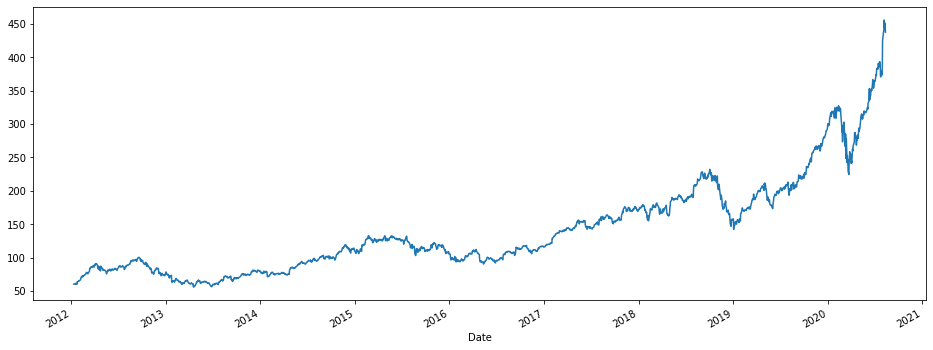

In [84]:
 df['AAPL'].plot(figsize=(16,6))

In [ ]:
df['GOOG'].plot(figsize=(16,6))

In [ ]:
df['T'].plot(figsize=(16,6))

In [ ]:
df['MGM'].plot(figsize=(16,6))

In [19]:
from matplotlib.pyplot import figure

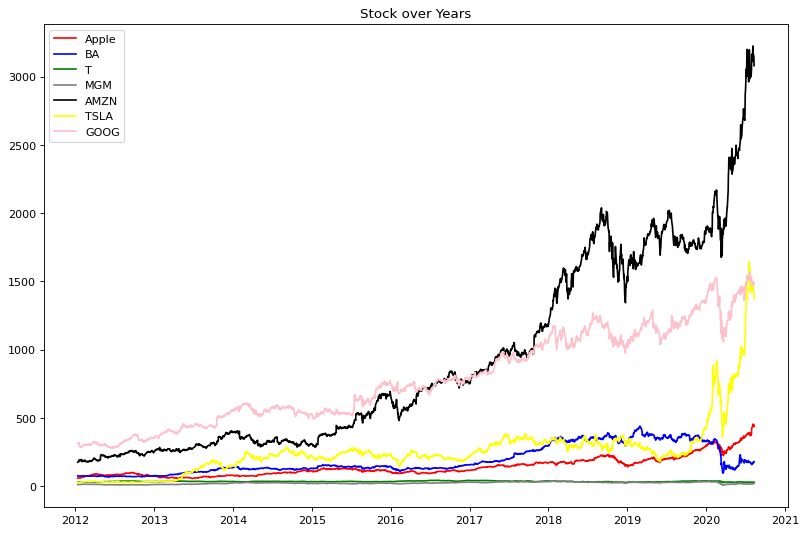

In [73]:
figure(figsize=(12,8), dpi=80)
plt.plot(df['AAPL'],c='red',label='Apple')
plt.plot(df['BA'],c='blue',label='BA')
plt.plot(df['T'],c='green',label='T')
plt.plot(df['MGM'],c='grey',label='MGM')
plt.plot(df['AMZN'],c='black',label='AMZN')
plt.plot(df['TSLA'],c='yellow',label='TSLA')
plt.plot(df['GOOG'],c='pink',label='GOOG')
plt.legend(loc='best')
plt.title("Stock over Years")
plt.show()

In [81]:
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [77]:
#rolling mean
df.rolling(7).mean().head(15)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-23,60.621837,75.285713,30.300000,12.577143,185.274283,182.828574,26.368571,307.931510,1304.597151
2012-01-24,60.601837,75.264285,30.295714,12.724286,186.855713,184.454287,26.250000,304.465219,1307.332868
2012-01-25,61.149796,75.438571,30.315714,12.832857,188.195714,186.250000,26.990000,300.515739,1312.614310


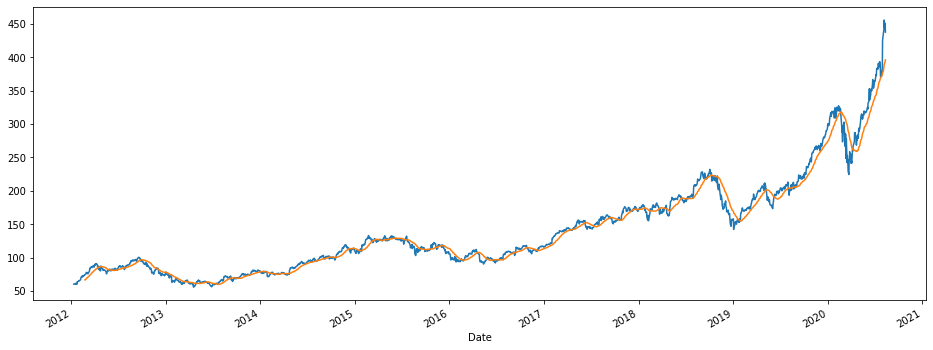

In [82]:
 df['AAPL'].plot(figsize=(16,6))
 df.rolling(window=30).mean()['AAPL'].plot()

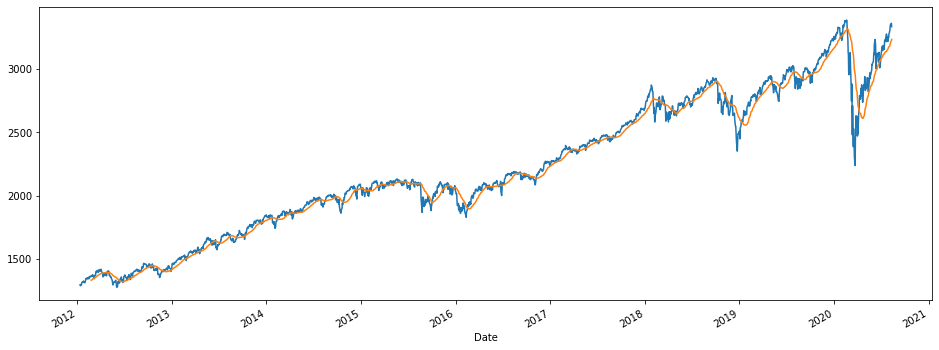

In [83]:
 df['sp500'].plot(figsize=(16,6))
 df.rolling(window=30).mean()['sp500'].plot()